In [1]:
!pip install seaborn
!pip install nltk
!pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
train_data = pd.read_csv("./Genre Classification Dataset/train_data.txt", delimiter=':::', header=None,engine='python')

In [4]:
test_data  = pd.read_csv("./Genre Classification Dataset/test_data.txt", delimiter=':::' ,header = None ,engine='python')

In [5]:
test_data_solution  = pd.read_csv("./Genre Classification Dataset/test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [6]:
## View train data 
print("shape",train_data.shape)
train_data.head()

shape (54214, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
train_data.columns = ["id", "Title", "Genre", "Description"]
train_data.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
train_data.drop_duplicates(inplace = True)

In [9]:
train_data.dropna( inplace = True )

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raveena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raveena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raveena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Predefined genres list
# predefined_genres = ["comedy", "horror", "thriller", "action"]
# 
# # Convert genre column in train_data to lowercase
# train_data['Genre'] = train_data['Genre'].str.lower()
# 
# print(train_data["Genre"].value_counts())
# 
# # # Convert predefined genres list to lowercase
# predefined_genres = [genre.lower() for genre in predefined_genres]
# 
# # # Filter the training data to keep only rows with genres in the predefined list
# data = train_data[train_data['Genre'].isin(predefined_genres)]
# 
# # Reset index if needed
# data.reset_index(drop=True, inplace=True)
# 
# # Display the filtered data
# print(data.head())

# Display the count of each genre in the filtered data
print(train_data["Genre"].value_counts())

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


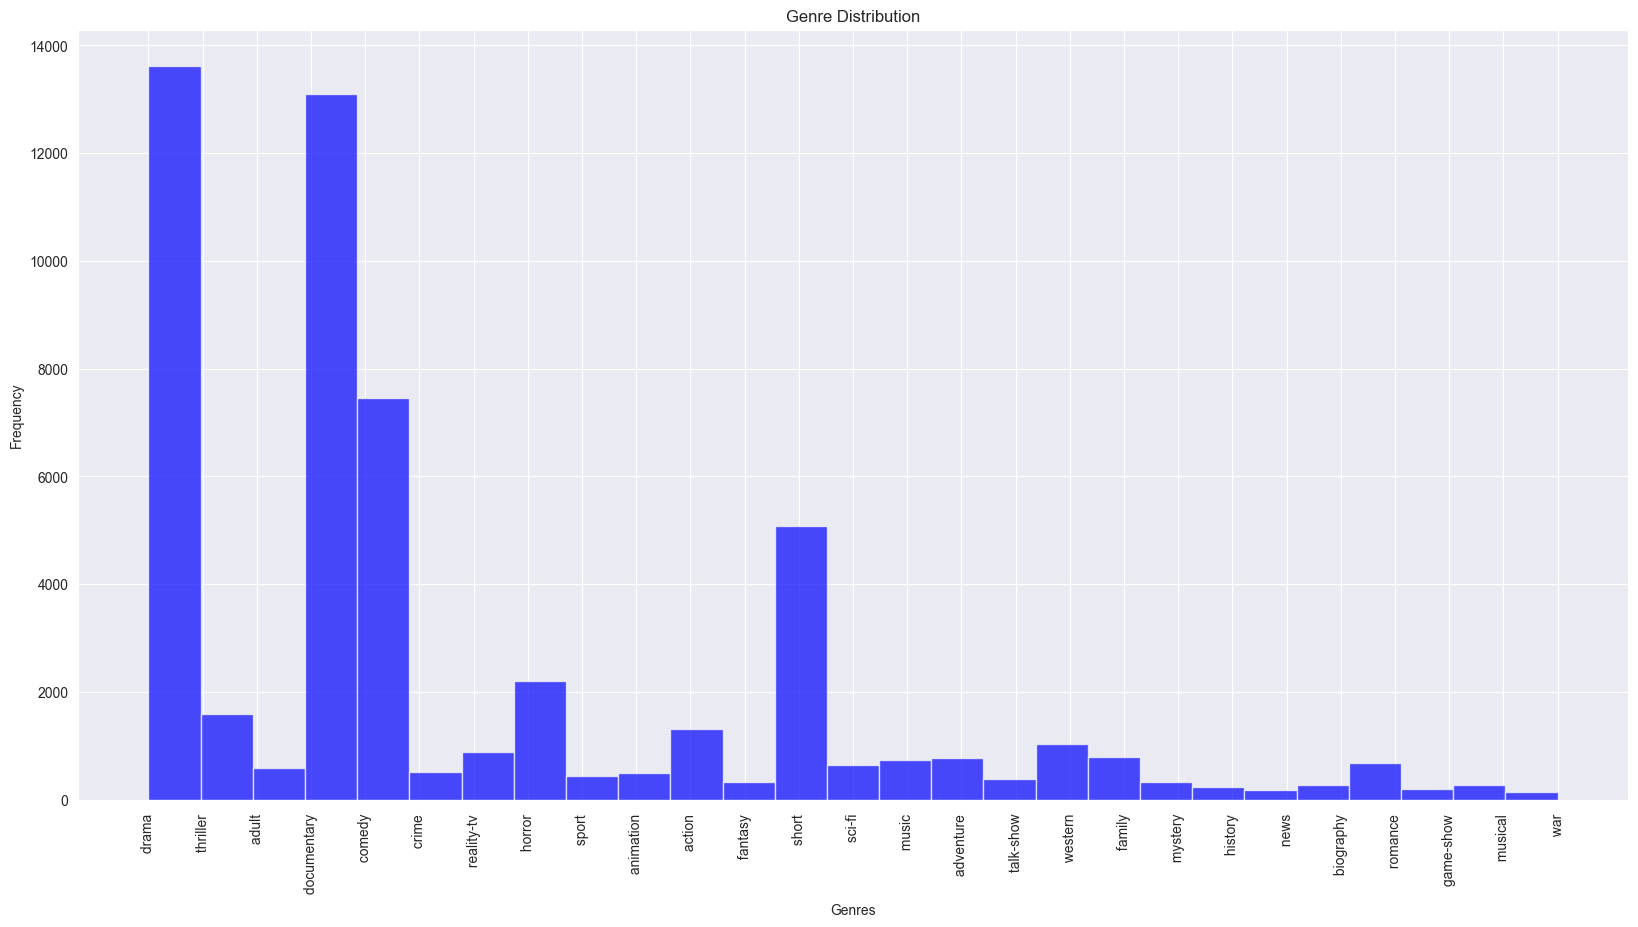

In [12]:
# Create a histogram of genre distribution
plt.figure(figsize=(20, 10))
plt.hist(train_data["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [13]:
# data = train_data.drop(["Title","id"] , axis = 1) # will drop column 
# data.head()

# Reset index if needed
train_data.reset_index(drop=True, inplace=True)

# Display the filtered data
train_data.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [14]:
train_data["Despcription_clean"] =  train_data["Description"].apply(preprocessing)
train_data.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [19]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [20]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Genre_encoded'] = label_encoder.fit_transform(train_data['Genre'])
train_data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names   

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [21]:
## Split the data
x = train_data["Despcription_clean"]
y = train_data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.2)

In [22]:
## Using TfidfVectorizer technique
vectorizer = TfidfVectorizer()
x_train2 = vectorizer.fit_transform(x_train)
x_test2 =  vectorizer.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest classifier with random_state
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with Random Forest classifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=1)

# Perform cross-validation with GridSearchCV
grid_search.fit(x_train2, y_train)

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Evaluate the best model
train_score = best_rf.score(x_train2, y_train)
test_score = best_rf.score(x_test2, y_test)
print("Best Random Forest Model - Train Score:", train_score)
print("Best Random Forest Model - Test Score:", test_score)

# Make predictions and print classification report
y_pred = best_rf.predict(x_test2)
print(classification_report(y_test, y_pred))


# from sklearn.model_selection import cross_val_score
# 
# 
# # Create a Random Forest model
# # random_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
# random_forest = RandomForestClassifier()
# # Perform cross-validation
# cv_scores = cross_val_score(random_forest, x_train2, y_train, cv=5)
# 
# # Fit the model with GridSearchCV
# random_forest.fit(x_train2, y_train)
# 
# 
# print("Random Forest - Train Score:",random_forest.score(x_train2, y_train))
# print("Random Forest - Test Score:", random_forest.score(x_test2, y_test))
# 
# y_pred = random_forest.predict(x_test2)
# print(classification_report(y_pred ,y_test))

# Perform cross-validation
# cv_scores = cross_val_score(random_forest, x_train2, y_train, cv=5)

# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# 
# # Print the mean and standard deviation of the cross-validation scores
# print("Mean CV Score:", cv_scores.mean())
# print("Std Dev CV Score:", cv_scores.std())

# cm = confusion_matrix(y_test, y_pred)
# 
# plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
# sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
#             xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix Heatmap')
# plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Train base models
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 2: TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Step 3: Train base models
rf_model = RandomForestClassifier()
rf_model.fit(x_train_tfidf, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_tfidf, y_train)

# Step 4: Make predictions with base models
rf_predictions = rf_model.predict(x_test_tfidf)
gb_predictions = gb_model.predict(x_test_tfidf)

# Step 5: Train meta-model
meta_features = np.column_stack((rf_predictions, gb_predictions))
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_test)

# Step 6: Evaluate accuracy
final_accuracy = meta_model.score(meta_features, y_test)
print("Final Accuracy:", final_accuracy)

In [1]:
#working random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate the Random Forest classifier with the specified hyperparameters
rf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=50, min_samples_leaf=50, random_state=42)

# Fit the Random Forest classifier to the training data
rf.fit(x_train2, y_train)

# Evaluate the Random Forest classifier
train_score = rf.score(x_train2, y_train)
test_score = rf.score(x_test2, y_test)
print("Random Forest Model - Train Score:", train_score)
print("Random Forest Model - Test Score:", test_score)

# Make predictions and print classification report
y_pred = rf.predict(x_test2)
print(classification_report(y_test, y_pred))

NameError: name 'x_train2' is not defined